In [121]:
text = '{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'

In [122]:
import re
listOfAllNumbers = re.findall(r'\d+', text)

In [123]:
listofRequiredNumbers = listOfAllNumbers[:-2]

In [124]:
listofRequiredNumbers

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '648',
 '649',
 '650',
 '651',
 '652',
 '653',
 '3']

In [125]:
import pandas as pd
import numpy as np

In [126]:
train_data = pd.read_csv("test_data_evaluation_part2.csv")
test_data = pd.read_csv("train_data_evaluation_part_2.csv")

In [127]:
train_data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Nationality           1000 non-null   object 
 3   Age                   967 non-null    float64
 4   DaysSinceCreation     1000 non-null   int64  
 5   AverageLeadTime       1000 non-null   int64  
 6   LodgingRevenue        1000 non-null   float64
 7   OtherRevenue          1000 non-null   float64
 8   BookingsCanceled      1000 non-null   int64  
 9   BookingsNoShowed      1000 non-null   int64  
 10  BookingsCheckedIn     1000 non-null   int64  
 11  PersonsNights         1000 non-null   int64  
 12  RoomNights            1000 non-null   int64  
 13  DaysSinceLastStay     1000 non-null   int64  
 14  DaysSinceFirstStay    1000 non-null   int64  
 15  DistributionChannel   

In [129]:
train_data.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,1000.000000,1000.000000,967.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,...,1000.0,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,83089.500000,83090.500000,39.720786,4.100000,36.840000,163.522530,42.612590,0.0,0.0,0.485000,...,0.0,0.006000,0.0,0.047000,0.440000,0.125000,0.003000,0.0,0.0,0.115000
std,288.819436,288.819436,19.161205,3.124702,66.375508,302.384328,96.491848,0.0,0.0,0.511896,...,0.0,0.077266,0.0,0.211745,0.496635,0.330884,0.054717,0.0,0.0,0.319182
min,82590.000000,82591.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,82839.750000,82840.750000,25.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,83089.500000,83090.500000,42.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,83339.250000,83340.250000,53.000000,6.000000,41.250000,252.000000,42.000000,0.0,0.0,1.000000,...,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
max,83589.000000,83590.000000,90.000000,11.000000,340.000000,3104.000000,1139.500000,0.0,0.0,2.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [130]:
test_data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

### Remove Rows having no age since the rows are less we are not going for mean/median/mode to fill age and instead going to delete the row

In [132]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [133]:
train_data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,82595,82596,PRT,42.0,11,1,59.00,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
train_data.shape

(967, 30)

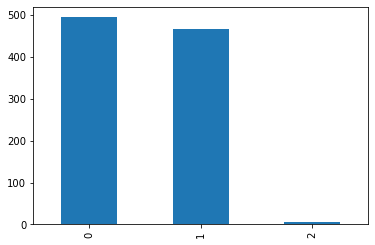

In [135]:
train_data['BookingsCheckedIn'].value_counts().plot.bar()

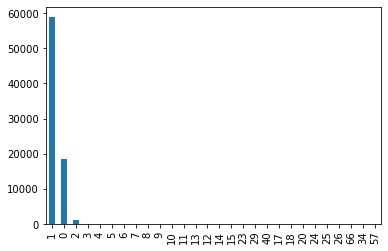

In [136]:
test_data['BookingsCheckedIn'].value_counts().plot.bar()

In [137]:
train_data = train_data.drop(["Unnamed: 0","ID","Nationality","DistributionChannel","MarketSegment"],axis=1)
test_data = test_data.drop(["Unnamed: 0","ID","Nationality","DistributionChannel","MarketSegment"],axis=1)

In [138]:
train_data.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,47.0,11,0,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.0,11,130,483.48,155.1,0,0,1,15,5,...,0,0,0,0,0,0,0,0,0,0
2,15.0,11,0,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.0,11,0,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42.0,11,1,59.00,7.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [139]:
x = train_data.drop(["BookingsCheckedIn"],axis=1)
y = train_data["BookingsCheckedIn"].values
x_test = test_data.drop(["BookingsCheckedIn"],axis=1)
y_test = test_data["BookingsCheckedIn"].values

In [140]:
x.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,DaysSinceLastStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,47.0,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,16.0,11,130,483.48,155.1,0,0,15,5,16,...,0,0,0,0,0,0,0,0,0,0
2,15.0,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,12.0,11,0,0.00,0.0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
5,42.0,11,1,59.00,7.0,0,0,1,1,12,...,0,0,0,0,0,0,0,0,0,0


In [141]:
x.shape

(967, 24)

In [142]:
print(y)

[0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0
 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0
 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 2 1 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1
 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 2 2 1 0 1
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 1 0 1 0 1 0 1 1 0 0 

In [143]:
print(np.unique(y))
print(len(np.unique(y)))

[0 1 2]
3


In [144]:
from keras.models import Sequential
from keras.layers import Dense

In [145]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(967,24)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [146]:
hist = model.fit(x, y,
          batch_size=32, epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4946
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4877
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4829
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4773
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4908
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4785
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4930
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4842
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4935
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss:

31/31 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 0.4742
Epoch 74/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4816
Epoch 75/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4750
Epoch 76/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4668
Epoch 77/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4808
Epoch 78/100
31/31 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 0.5165
Epoch 79/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4769
Epoch 80/100
31/31 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 0.4707
Epoch 81/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4897
Epoch 82/100
31/31 [==============================] - 0s 1ms/step - los

In [147]:
model.evaluate(x_test, y_test)[1]

2464/2464 [==============================] - 2s 651us/step - loss: 0.0000e+00 - accuracy: 0.7474


0.7473932504653931

In [149]:
y_pred=model.predict(x_test)

In [150]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)